In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kernel_rbf(a, b, L): 
    output = -1 * np.ones((a.shape[0], b.shape[0])) 
    for i in range(a.shape[0]):
        for j in range(b.shape[0]):
            output[i, j] = np.power(np.linalg.norm(a[i, :] - b[j, :], 2), 2)
    return np.exp(- L * output)

In [3]:
class GaussianProcessRegressor: 

    def __init__(self, kernel_L, sigma_sq_process, input_dim):
        self.kernel_L = kernel_L
        self.sigma_sq_process = sigma_sq_process  
        self.input_dim = input_dim

    def load_data(self, x, y):
        n = x.shape[0]
        self.x_vect = np.array([x]).reshape(n, self.input_dim)
        self.y_vect = np.array([y]).reshape(n, 1)
        self.K_matrix = kernel_rbf(self.x_vect, self.x_vect, self.kernel_L) + self.sigma_sq_process * np.eye(n)
        self.K_matrix_inv = np.linalg.inv(self.K_matrix)
    
    def compute(self, x):
        assert x.ndim == 2 and x.shape[1] == self.input_dim, "compute() function: Error in input dimension"
        n = x.shape[0]
        mu = np.zeros(n)
        sigma = np.zeros(n)
        for i in range(n):
            K_star = kernel_rbf(self.x_vect, x[i, :].reshape(1, self.input_dim), self.kernel_L)
            mu[i] = K_star.T @ self.K_matrix_inv @ self.y_vect
            sigma[i] = kernel_rbf(x[i, :].reshape(1, self.input_dim), x[i, :].reshape(1, self.input_dim), self.kernel_L) - K_star.T @ self.K_matrix_inv @ K_star
        return mu, sigma

/var/folders/58/jk09dpw90wv_97d9nbc3mnn00000gn/T/ipykernel_12654/479082720.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu[i] = K_star.T @ self.K_matrix_inv @ self.y_vect
/var/folders/58/jk09dpw90wv_97d9nbc3mnn00000gn/T/ipykernel_12654/479082720.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma[i] = kernel_rbf(x[i, :].reshape(1, self.input_dim), x[i, :].reshape(1, self.input_dim), self.kernel_L) - K_star.T @ self.K_matrix_inv @ K_star
/var/folders/58/jk09dpw90wv_97d9nbc3mnn00000gn/T/ipykernel_12654/479082720.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future

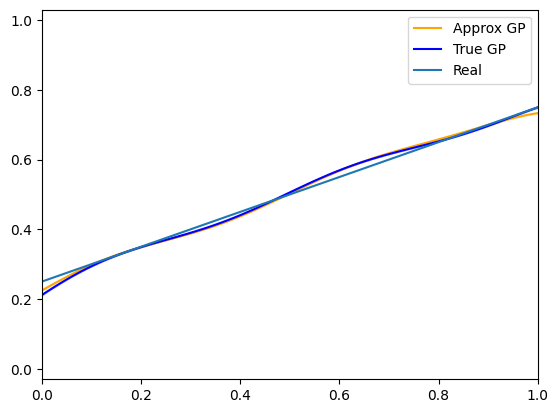

In [4]:
kernel_L = 5
base_sigma_sq = 0.25
n_samples = 5000
x_plt = np.linspace(0, 1, 100) # plot 100 samples
function_expected = lambda x  : 0.5 * x + 0.25

np.random.seed(1)
data_x = np.random.uniform(0, 1, n_samples)
values_exp = function_expected(data_x)
data_y = np.array(np.random.uniform(0, 1, n_samples) < values_exp, dtype=int)

approx_data_x = np.round(data_x, 1)
approx_regressor = GaussianProcessRegressor(kernel_L, base_sigma_sq, 1)
approx_regressor.load_data(approx_data_x, data_y)
y_hat, y_sigma = approx_regressor.compute(x_plt.reshape(-1, 1))

plt.plot(x_plt, y_hat, color="orange", label="Approx GP")
plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, color="orange", alpha=0.2)

regressor = GaussianProcessRegressor(kernel_L, base_sigma_sq, 1)
regressor.load_data(data_x, data_y)
# regressor.K_matrix_inv = approx_regressor.K_matrix_inv
# regressor.K_matrix_inv = 4 * np.eye(n_samples)
y_hat, y_sigma = regressor.compute(x_plt.reshape(-1, 1))

plt.plot(x_plt, y_hat, color="blue", label="True GP")
plt.fill_between(x_plt, y_hat - y_sigma, y_hat + y_sigma, color="blue", alpha=0.2)
# plt.scatter(data_x, data_y, color="blue", label="True GP Data")

plt.plot(x_plt, function_expected(x_plt), label="Real")

plt.xlim([0, 1])
plt.ylim([- 0.03, 1.03])
plt.legend()

In [9]:
target = 0.245

K_star = kernel_rbf(regressor.x_vect, np.array([target]).reshape(1, regressor.input_dim), regressor.kernel_L)
approx_K_star = kernel_rbf(approx_regressor.x_vect, np.array([target]).reshape(1, approx_regressor.input_dim), approx_regressor.kernel_L)

In [10]:
"""
print(f'K_star:\t\t\t\t\t\t\t{np.round(K_star.T, 2)}')
print(f'approx_K_star:\t\t\t\t\t\t{np.round(approx_K_star.T, 2)}')
print(f'K_star.T @ regressor.K_matrix_inv:\t\t\t{np.round(K_star.T @ regressor.K_matrix_inv, 2)}')
print(f'approx_K_star.T @ approx_regressor.K_matrix_inv:\t{np.round(approx_K_star.T @ approx_regressor.K_matrix_inv, 2)}')
print(f'K_star.T @ approx_regressor.K_matrix_inv:\t\t{np.round(K_star.T @ approx_regressor.K_matrix_inv, 2)}')
print(f'approx_K_star.T @ regressor.K_matrix_inv:\t\t{np.round(approx_K_star.T @ regressor.K_matrix_inv, 2)}')
"""

"\nprint(f'K_star:\t\t\t\t\t\t\t{np.round(K_star.T, 2)}')\nprint(f'approx_K_star:\t\t\t\t\t\t{np.round(approx_K_star.T, 2)}')\nprint(f'K_star.T @ regressor.K_matrix_inv:\t\t\t{np.round(K_star.T @ regressor.K_matrix_inv, 2)}')\nprint(f'approx_K_star.T @ approx_regressor.K_matrix_inv:\t{np.round(approx_K_star.T @ approx_regressor.K_matrix_inv, 2)}')\nprint(f'K_star.T @ approx_regressor.K_matrix_inv:\t\t{np.round(K_star.T @ approx_regressor.K_matrix_inv, 2)}')\nprint(f'approx_K_star.T @ regressor.K_matrix_inv:\t\t{np.round(approx_K_star.T @ regressor.K_matrix_inv, 2)}')\n"

In [11]:
target_vect = K_star.T @ regressor.K_matrix_inv

print(f'approx_K_star.T @ approx_regressor.K_matrix_inv:\t{np.round(np.linalg.norm(approx_K_star.T @ approx_regressor.K_matrix_inv - target_vect, 2), 2)}')
print(f'K_star.T @ approx_regressor.K_matrix_inv:\t\t{np.round(np.linalg.norm(K_star.T @ approx_regressor.K_matrix_inv - target_vect, 2), 2)}')
print(f'approx_K_star.T @ regressor.K_matrix_inv:\t\t{np.round(np.linalg.norm(approx_K_star.T @ regressor.K_matrix_inv - target_vect, 2), 2)}')

approx_K_star.T @ approx_regressor.K_matrix_inv:	0.01
K_star.T @ approx_regressor.K_matrix_inv:		10.29
approx_K_star.T @ regressor.K_matrix_inv:		10.58


In [8]:
"""
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n_plot_samples = 1000

max_val = 0
for x in np.linspace(0, 1, n_plot_samples):
    for z in np.linspace(0, 1, n_plot_samples):
        ax.scatter(x, z, np.exp(-5*((x-z)*(x-z))) - np.exp(-5*((x+0.05-z)*(x+0.05-z))))
        max_val = max(np.exp(-5*(np.power(x-z, 2))) - np.exp(-5*(np.power(x-z+0.1, 2))), max_val)
max_val
"""

# np.max(np.abs(approx_regressor.K_matrix - regressor.K_matrix))

# np.round(np.linalg.inv(regressor.K_matrix - base_sigma_sq * np.eye(n_samples)), 2)
# np.round(np.linalg.inv(regressor.K_matrix), 2)

# np.round(np.linalg.inv(approx_regressor.K_matrix - base_sigma_sq * np.eye(n_samples)), 2)
# np.round(np.linalg.inv(approx_regressor.K_matrix), 2)

"\n%matplotlib qt\n\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nn_plot_samples = 1000\n\nmax_val = 0\nfor x in np.linspace(0, 1, n_plot_samples):\n    for z in np.linspace(0, 1, n_plot_samples):\n        ax.scatter(x, z, np.exp(-5*((x-z)*(x-z))) - np.exp(-5*((x+0.05-z)*(x+0.05-z))))\n        max_val = max(np.exp(-5*(np.power(x-z, 2))) - np.exp(-5*(np.power(x-z+0.1, 2))), max_val)\nmax_val\n"